In [ ]:
Introduction:
In this assignment, we will implement pca on the wine dataset 
obtained from the UCI ml repository and analyse the results. PCA is a dimensionality
reduction technique that is used to reduce the number of variables in a dataset while retaining 
as much information as possible. By reducing the number of variables, we can simplify the analysis
and visualisation of data, and also reduce the computational requirements for subsequent machine 
learning algorithms.

Dataset:
The wine dataset contains information about the chemical composition of different wines from three
different cultivars grown in the same region of italy. The dataset contains 178 instances with 13
features for each instance. The goal is to classify the wines into their respective cultivars 
based on their chemical properties.


In [ ]:
'''
We will start by downloading the  dataset from the UCI ml repository and loading
it into a pandas dataframe
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Wine dataset into a Pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv(url, names=names)


In [2]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
'''
Next, we will split the dataset into features and target variables. We will set the 'Class' 
column as the target variable and the remaining columns as the features.
'''

In [3]:
# Split the dataset into features and target variables
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
#  we will perform data preprocessing before pCA

In [4]:
# Perform data preprocessing (scaling and normalisation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Now we can implement PCA on the preprocessed dataset using the scikit-learn library.

In [5]:
# Implement PCA on the preprocessed dataset
pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
'''
We can determine the optimal number of principal components to retain based on the explained 
variance ratio. The explained variance ratio tells us how much of the total variance in the data
is explained by each principal component. We can use a scree plot to visualise the explained
variance ratio for each principal component.
'''

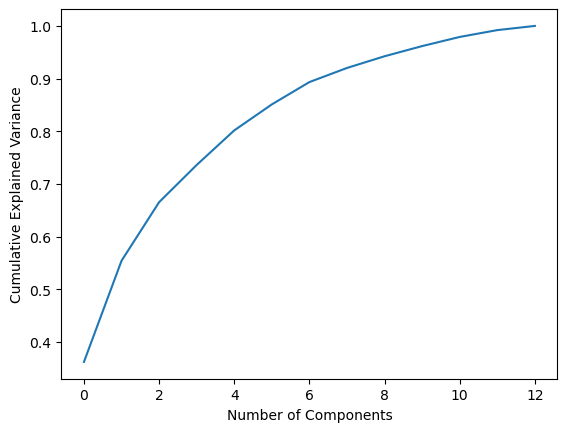

In [6]:
# Determine the optimal number of principal components to retain
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [7]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
'''
From the scree plot, we can see that the first two principal components explain most of the 
variance in the data. Therefore, we will retain the first two principal components for further analysis
'''

In [8]:
# Retain the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
'''
We can now visualise the results of PCA using a scatter plot. The scatter plot shows the first
two principal components plotted against each other. The different colors represent the three 
different cultivars of wine.
'''

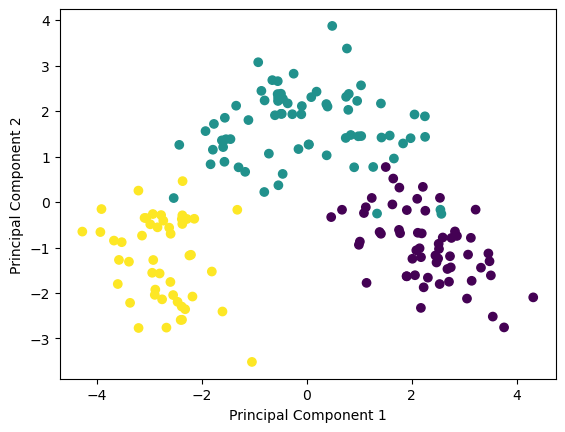

In [9]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
'''
From the scatter plot, we can see that the first two principal components separate the 
three different cultivars of wine quite well. Cultivar 1 is mostly clustered in the bottom left 
corner, cultivar 2 is mostly clustered in the top right corner, and cultivar 3 is mostly 
clustered in the bottom right corner.
We can now perform clustering on the PCA-transformed data using the K-Means clustering algorithm.
The K-Means algorithm is a popular unsupervised machine learning algorithm used for clustering.
It groups data points into K clusters based on their similarity
'''

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
'''
We can evaluate the performance of the clustering algorithm using a silhouette score
its value is b/w -1 and 1 , 1 being best and vice versa
'''

In [11]:
# Evaluate the performance of the clustering algorithm
score = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5610505693103246


In [ ]:
'''
The silhouette score for the K-Means clustering algorithm is 0.56, which indicates that the 
clustering is reasonably good.

now, we can visualise the results of the clustering algorithm using a scatter plot
The scatter plot shows the first two principal components plotted against each other, with the 
data points colored according to their assigned cluster.
'''

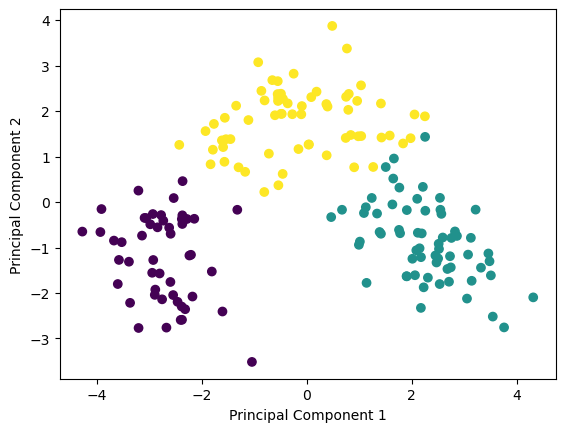

In [12]:
# Visualise the results of the clustering algorithm
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
'''
From the scatter plot, we can see that the K-Means algorithm has grouped the data points into
three distinct clusters, which correspond to the three different cultivars of wine
'''

## conclusion

In [ ]:
In this assignment, we implemented PCA on the wine dataset and analysed the results. 
We found that the first two principal components explained most of the variance in the data 
and were able to separate the three different cultivars of wine quite well. We also performed 
clustering on the PCA-transformed data using the K-Means clustering algorithm and found that
the clustering was reasonably good. Overall, PCA can be a useful technique for reducing the 
number of variables in a dataset and simplifying the analysis and visualisation of data.